# Lab 4: Exploring 1D Data Visualizations

## Objective

This lab will guide you through visualizing **one-dimensional (univariate)** data distributions using various plotting techniques. You will practice extracting key insights from **numerical** and **categorical** data using histograms, bar plots, pie charts, and box plots — essential tools in Exploratory Data Analysis (EDA).


## Dataset

The dataset used is a modified Titanic dataset containing both numerical and categorical features. It was obtained from Kaggle and contains information such as passenger age, class, and survival status.

We will use the **'Age'** column for numerical visualizations.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("data/train_and_test2.csv")
df.head()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


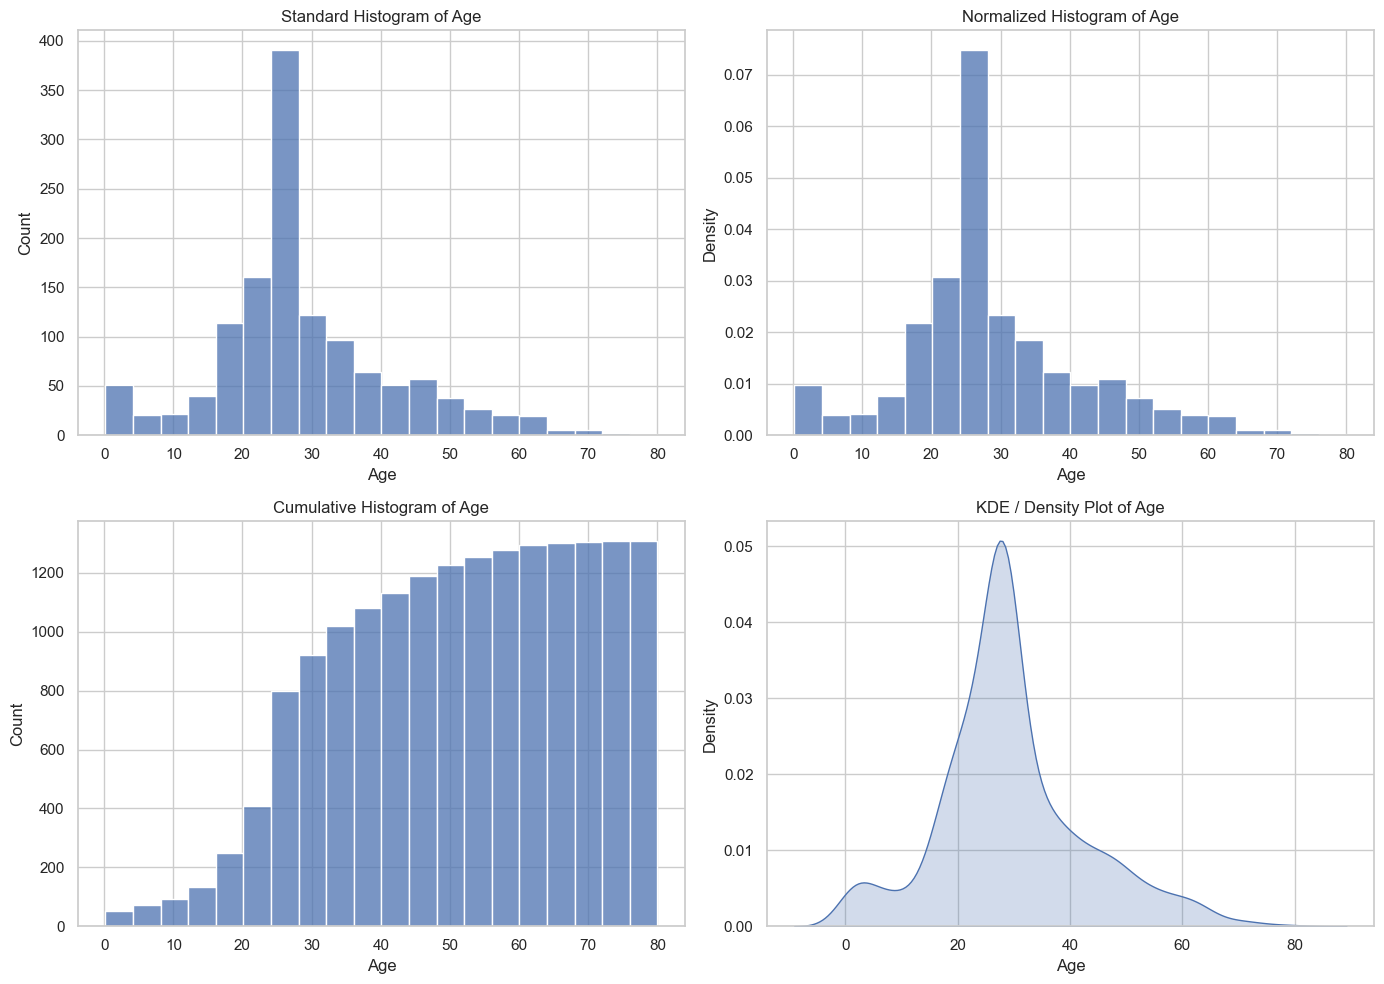

In [14]:
# Clean the Age column
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
age_clean = df['Age'].dropna()

# Plot various histogram types
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(age_clean, bins=20, kde=False, ax=axs[0, 0])
axs[0, 0].set_title('Standard Histogram of Age')

sns.histplot(age_clean, bins=20, stat='density', kde=False, ax=axs[0, 1])
axs[0, 1].set_title('Normalized Histogram of Age')

sns.histplot(age_clean, bins=20, cumulative=True, kde=False, ax=axs[1, 0])
axs[1, 0].set_title('Cumulative Histogram of Age')

sns.kdeplot(age_clean, fill=True, ax=axs[1, 1])
axs[1, 1].set_title('KDE / Density Plot of Age')

plt.tight_layout()
plt.show()


### Visualizing the 'Age' Column

The 'Age' feature is a numerical variable from the Titanic dataset. We visualize it using:
- A standard histogram for frequency counts
- A normalized histogram for density analysis
- A cumulative histogram to observe distribution growth
- A KDE plot to understand the estimated density function

Before plotting, all non-numeric and missing values are filtered from the 'Age' column.


## Bar Plots

We use the **'Sex'** column from the Titanic dataset for categorical analysis using bar plots.


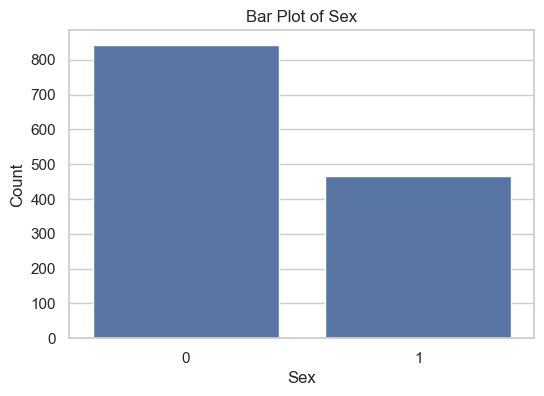

In [15]:
# Bar Plot for 'Sex' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title('Bar Plot of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


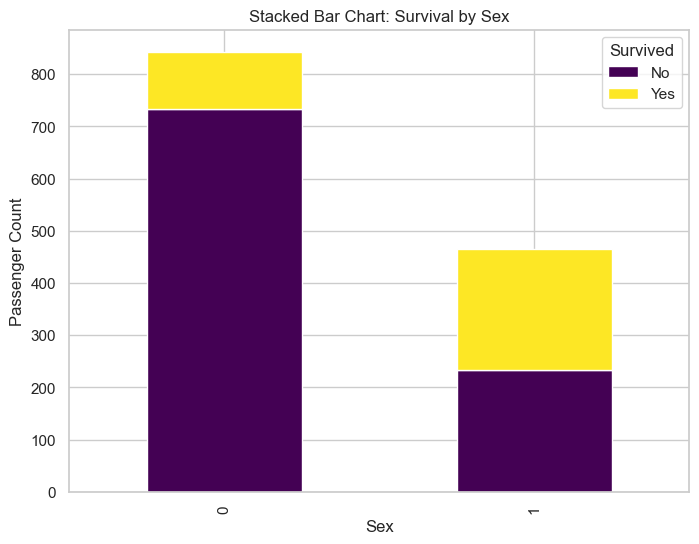

In [ ]:
# Prepare data
stacked_data = df.groupby(['Sex', '2urvived']).size().unstack()

# Plot
stacked_data.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Stacked Bar Chart: Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Passenger Count')
plt.legend(title='2urvived', labels=['No', 'Yes'])
plt.show()


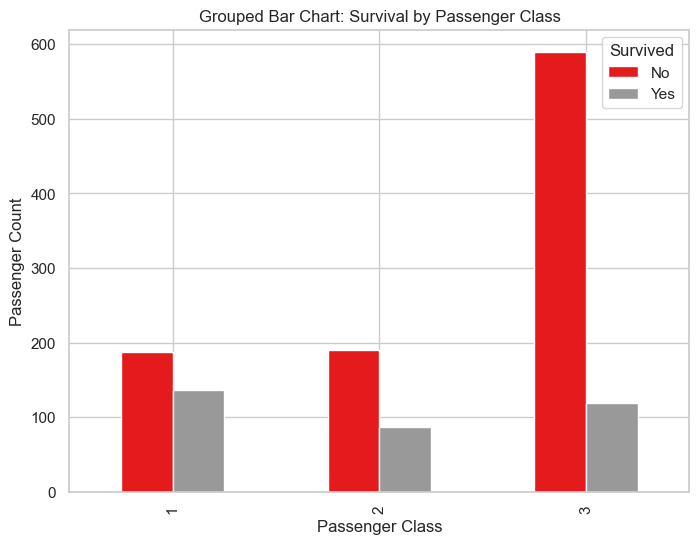

In [ ]:
# Prepare data
grouped_data = df.groupby(['Pclass', '2urvived']).size().unstack()

# Plot
grouped_data.plot(kind='bar', figsize=(8, 6), colormap='Set1')
plt.title('Grouped Bar Chart: Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.legend(title='2urvived', labels=['No', 'Yes'])
plt.show()


## Pie Charts

We analyze category proportions using the **'Pclass'** (Passenger Class) column.


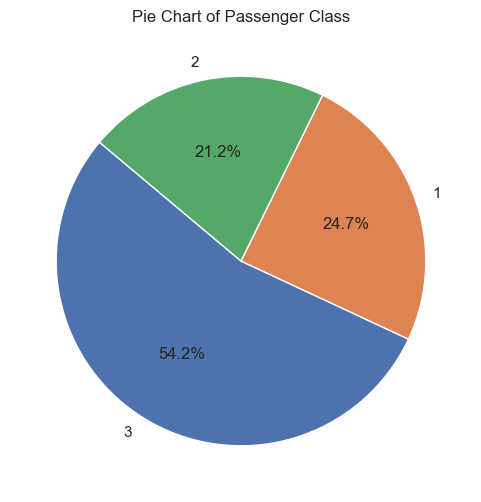

In [ ]:
# Pie chart for 'Pclass'
pclass_counts = df['Pclass'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Passenger Class')
plt.show()


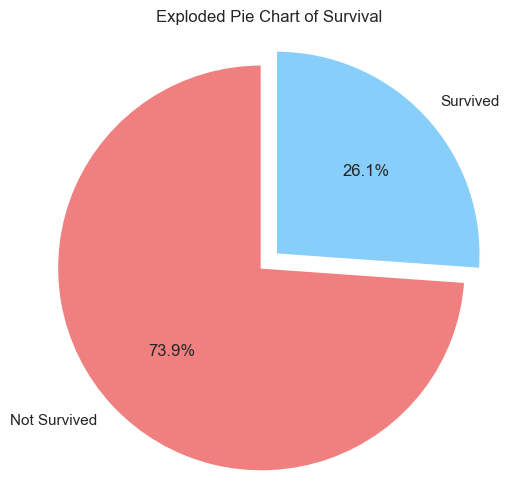

In [ ]:
# Pie chart data
2urvived_counts = df['2urvived'].value_counts()
labels = ['Not 2urvived', '2urvived']
explode = (0.1, 0)  # "explode" the 1st slice (Not 2urvived)

# Plot
plt.figure(figsize=(6, 6))
plt.pie(2urvived_counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, colors=['lightcoral', 'lightskyblue'])
plt.title('Exploded Pie Chart of Survival')
plt.axis('equal')
plt.show()


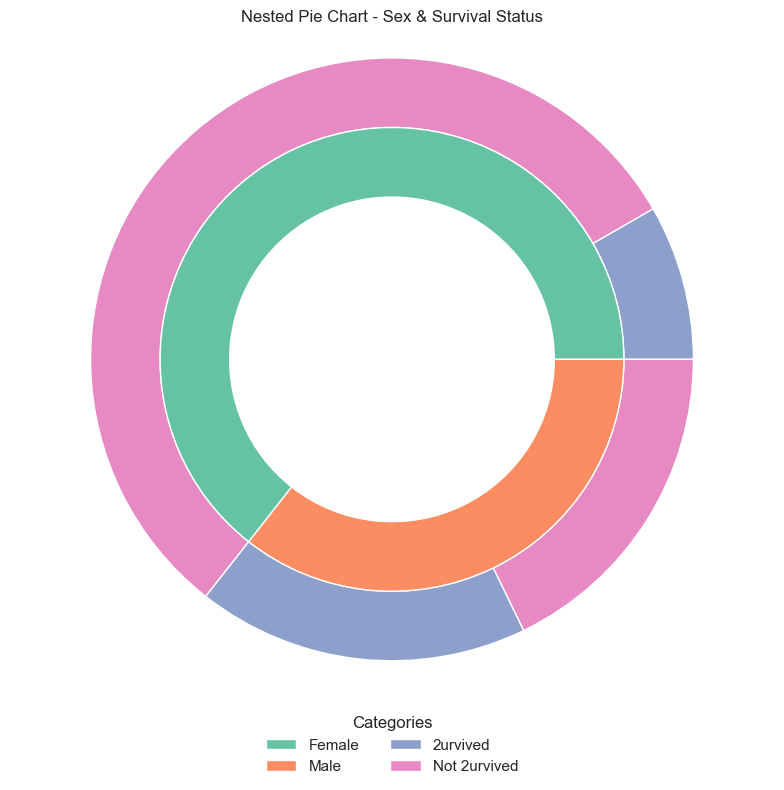

In [28]:
from matplotlib.patches import Patch

# Inner ring: Sex
inner_labels = df['Sex'].value_counts().index.tolist()
inner_sizes = df['Sex'].value_counts().values.tolist()
inner_colors = ['#66c2a5', '#fc8d62']  # Female, Male

# Outer ring: Survival by Sex
outer_labels = []
outer_sizes = []
outer_colors = []

surv_colors = {
    1: '#8da0cb',  # 2urvived
    0: '#e78ac3'   # Not 2urvived
}

for sex in inner_labels:
    surv_counts = df[df['Sex'] == sex]['2urvived'].value_counts()
    for outcome in [1, 0]:
        count = surv_counts.get(outcome, 0)
        outer_labels.append(f'{sex} - {"2urvived" if outcome == 1 else "Not 2urvived"}')
        outer_sizes.append(count)
        outer_colors.append(surv_colors[outcome])

# Plot the nested donut chart
fig, ax = plt.subplots(figsize=(8, 8))

# Outer ring
ax.pie(
    outer_sizes,
    radius=1.3,
    labels=None,
    colors=outer_colors,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

# Inner ring
ax.pie(
    inner_sizes,
    radius=1,
    labels=None,
    colors=inner_colors,
    wedgeprops=dict(width=0.3, edgecolor='white'),
    labeldistance=0.7
)

# Legend
legend_elements = [
    Patch(facecolor='#66c2a5', label='Female'),
    Patch(facecolor='#fc8d62', label='Male'),
    Patch(facecolor='#8da0cb', label='2urvived'),
    Patch(facecolor='#e78ac3', label='Not 2urvived')
]

plt.legend(
    handles=legend_elements,
    title='Categories',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False
)

plt.title('Nested Pie Chart - Sex & Survival Status')
plt.axis('equal')
plt.tight_layout()
plt.show()


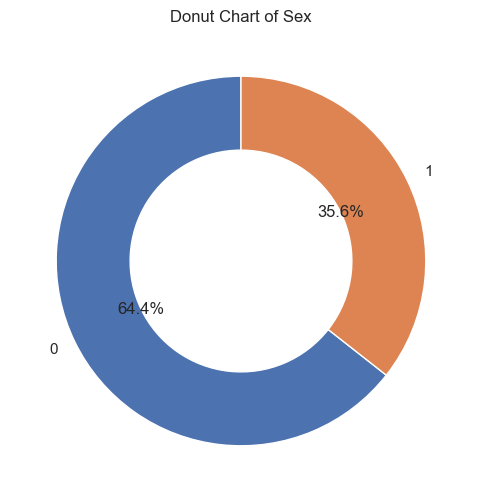

In [29]:
# Donut Chart
sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Donut Chart of Sex')
plt.show()

## Box Plots

We use the **'Fare'** column to explore the statistical summary using box plots.


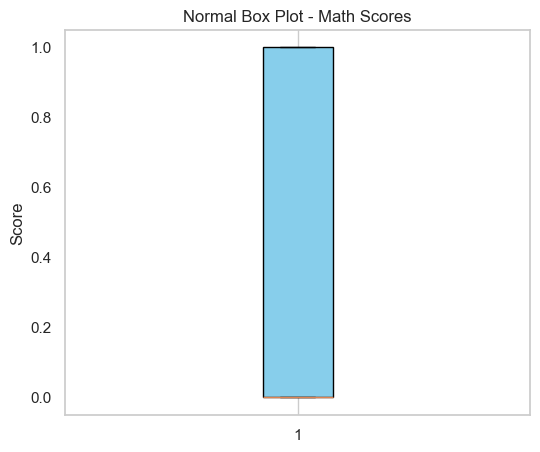

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot(df['2urvived'], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Normal Box Plot - Survived')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_2004\854699119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Age', data=df, palette='Set2')


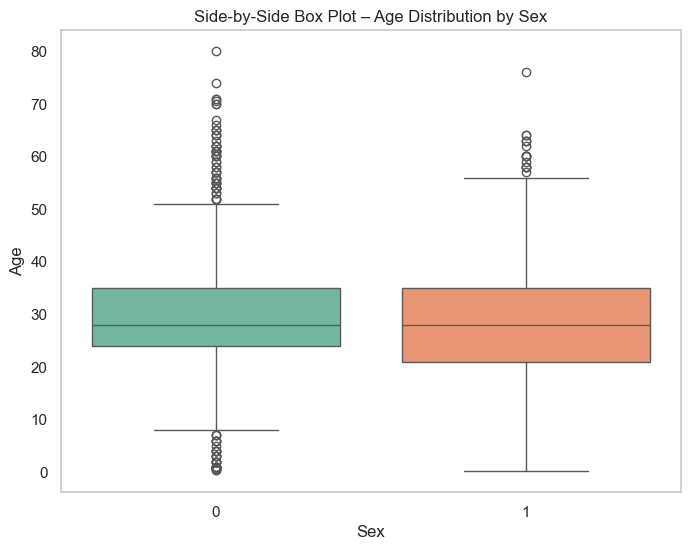

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Age', data=df, palette='Set2')
plt.title('Side-by-Side Box Plot – Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.grid(axis='y')
plt.show()

# Median age for each gender
medians = df.groupby('Sex')['Age'].median()




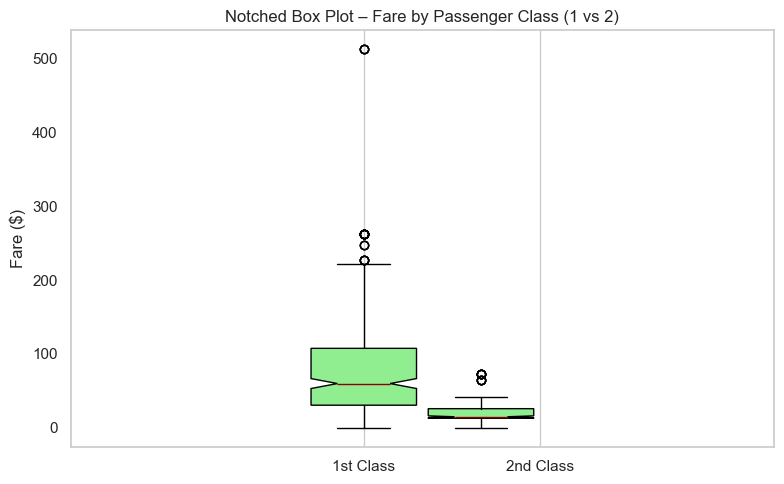

Five-Number Summary – 1st Class:
 {'Min': np.float64(0.0), 'Q1': np.float64(30.6958), 'Median (Q2)': np.float64(60.0), 'Q3': np.float64(107.6625), 'Max': np.float64(512.3292)}

Five-Number Summary – 2nd Class:
 {'Min': np.float64(0.0), 'Q1': np.float64(13.0), 'Median (Q2)': np.float64(15.0458), 'Q3': np.float64(26.0), 'Max': np.float64(73.5)}


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Helper for five-number summary
def five_number_summary(data):
    return {
        "Min": np.min(data),
        "Q1": np.percentile(data, 25),
        "Median (Q2)": np.median(data),
        "Q3": np.percentile(data, 75),
        "Max": np.max(data)
    }

# Extract fare data from filtered_df for two classes
fare_class1 = df[df['Pclass'] == 1]['Fare'].dropna()
fare_class2 = df[df['Pclass'] == 2]['Fare'].dropna()

# Notched Box Plot with close positions
plt.figure(figsize=(8, 5))
plt.boxplot(
    [fare_class1, fare_class2],
    positions=[1.0, 1.2],
    widths=0.18,
    notch=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen'),
    medianprops=dict(color='darkred')
)

plt.xticks([1.0, 1.3], ['1st Class', '2nd Class'])
plt.title('Notched Box Plot – Fare by Passenger Class (1 vs 2)')
plt.ylabel('Fare ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Print statistical summaries
summary1 = five_number_summary(fare_class1)
summary2 = five_number_summary(fare_class2)

print("Five-Number Summary – 1st Class:\n", summary1)
print("\nFive-Number Summary – 2nd Class:\n", summary2)


## Violin Plot

We use the **'Age'** distribution split by **'Sex'** to create a violin plot.


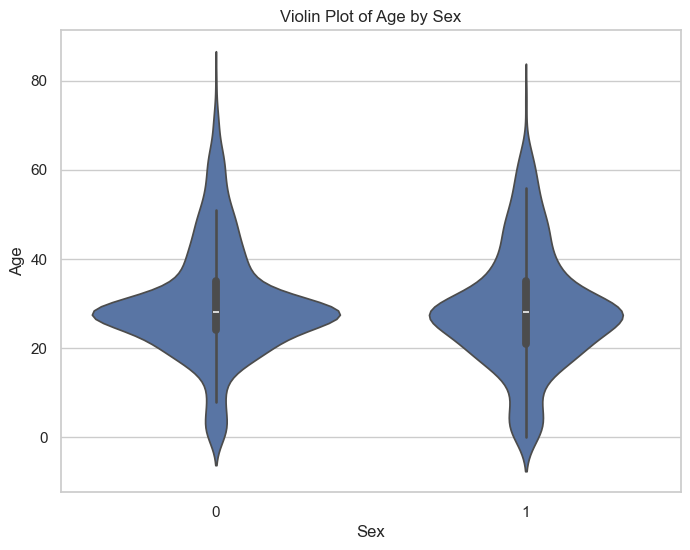

In [ ]:
# Violin Plot of Age by Sex
plt.figure(figsize=(8, 6))
sns.violinplot(x='Sex', y='Age', data=df)
plt.title('Violin Plot of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()


## Lollipop Chart

We use **'Pclass'** and **'2urvived'** to visualize survival count by class in a lollipop chart.


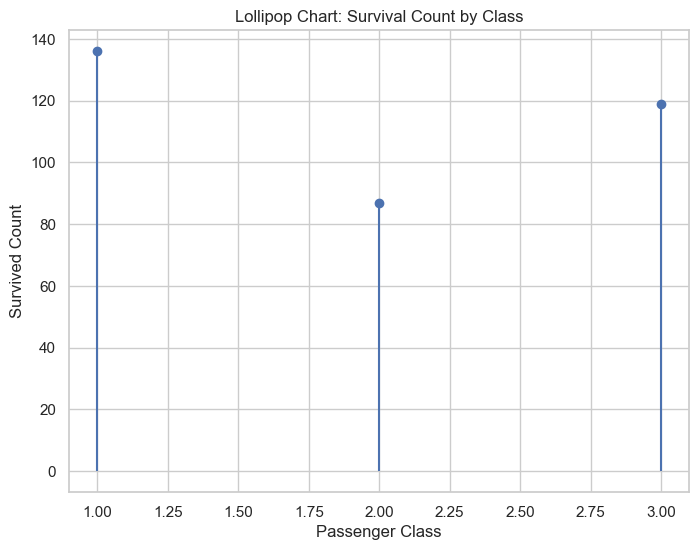

In [ ]:
# Lollipop Chart of survival count by Pclass
survival_by_class = df.groupby('Pclass')['2urvived'].sum().sort_index()
plt.figure(figsize=(8, 6))
plt.stem(survival_by_class.index, survival_by_class.values, basefmt=" ")
plt.title('Lollipop Chart: Survival Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('2urvived Count')
plt.show()
